In [9]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import time

def divide(x,y):
  if y==0:
    return 0
  else:
    return x/y

# Training
start=time.time()

skin_array = [[ [0 for col in range(256)] for col in range(256)] for row in range(256)]
nonskin_array = [[ [0 for col in range(256)] for col in range(256)] for row in range(256)]

image_count = 555
indices = ["%04d" % x for x in range(1000)]
for image_index in range(image_count):
    mask_img_name = "ibtd/Mask/"+str(indices[image_index])+".bmp"
    unmask_img_name = "ibtd/"+str(indices[image_index])+".jpg"

    mask_img = imageio.imread(mask_img_name)
    unmask_img = imageio.imread(unmask_img_name)
    height, width, channels = mask_img.shape

    for x in range(height):
      for y in range(width):
        b=mask_img[x][y][0]
        g=mask_img[x][y][1]
        r=mask_img[x][y][2]

        if r>220 and g>220 and b>220:
          b = unmask_img[x][y][0] 
          g = unmask_img[x][y][1] 
          r = unmask_img[x][y][2]
          #print(mask_img_name,image_index,r,g,b)
          nonskin_array[r][g][b] = nonskin_array[r][g][b] + 1
        else:
          skin_array[r][g][b] = skin_array[r][g][b] + 1

skin_sum = 0
nonskin_sum = 0
for x in range(256):
  for y in range(256):
    skin_sum = skin_sum + sum(skin_array[x][y])
    nonskin_sum = nonskin_sum + sum(nonskin_array[x][y])

result_array = [[ [0 for col in range(256)] for col in range(256)] for row in range(256)]
for x in range(256):
  for y in range(256):
    for z in range(256):
      skin_array[x][y][z] = divide(skin_array[x][y][z] , skin_sum)
      nonskin_array[x][y][z] = divide(nonskin_array[x][y][z] , nonskin_sum)
      result_array[x][y][z] = divide(skin_array[x][y][z] , nonskin_array[x][y][z])

# Saving
np.save("result_array.npy", result_array)

end=time.time()
print(f"Total processed time: {end-start} seconds...")

Total processed time: 298.4978668689728 seconds...


Total processing time: 0.7457418441772461 seconds...


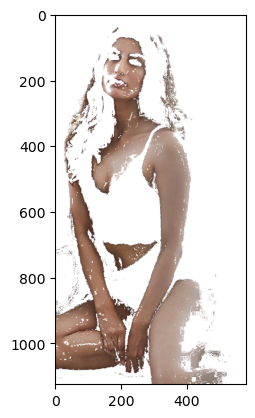

In [11]:
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np
import time

# Loading
result_array = np.load("result_array.npy")
# Testing
test_image_name = "Indian-model-Erika-Packard.jpg"
test_image = imageio.imread(test_image_name)
height, width, channel = test_image.shape

start=time.time()

for x in range(height):
  for y in range(width):
    b=test_image[x][y][0]
    g=test_image[x][y][1]
    r=test_image[x][y][2]

    if abs(result_array[r][g][b]) < 0.4:
      test_image[x][y][0] = 255
      test_image[x][y][1] = 255
      test_image[x][y][2] = 255

end=time.time()
print(f"Total processing time: {end-start} seconds...")

plt.imshow(test_image)